<a href="https://colab.research.google.com/github/912amanjeet/dataAnalyst/blob/main/Interactive_TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Interactive** **TextAnalysis**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
import re
import nltk

In [7]:
def clean_text(text):
    text = text.lower()   #  Lowercase conversion
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # URL removal
    text = re.sub(r'<.*?>', '', text) # HTML tag removal
    text = re.sub(r'[^a-z\s]', '', text) # Special character removal
    text = re.sub(r'\s+', ' ', text).strip() # Extra whitespace removal   #strip to remove forward or backward spcaes
    text = re.sub(r'\S+@\S+\.\S+', '', text) # email removal
    text = re.sub(r'[^\w\s]', '', text) # punctuations
    text = re.sub(r'(.)\1{2,}', r'\1', text) # Repeated Characters / Elongated Words
    text = re.sub(r'#', '', text) # Hashtags (like from Twitter/Instagram)
    text= re.sub(r'@\w+', '', text) # Mention username
    text= re.sub(r'[^\x00-\x7F]+', '', text) # non ASCII characters (emojis , foreign characters)
    return text

In [8]:
dirty_para="""<Review>OMG!!! 😱 I Loooove the NEW Phone Max 13 Pro+++... it's amaaaazinggg!!! 😍😍😍
Visit https://www.phone-world.com/product?id=123 or check www.tech-deals.net 😎📱
Seriously, best purchase ever (even though it cost me $1,299.99)!!!
Customer support was gr8! Contacted them via email: support@phone-world.com & got a reply within 2 hrs.
Follow them @PhoneWorldOfficial for #deals and more info!!
P.S. -- I had to return the case [wrong size] but the process was smooth.
    TOO     MANY     SPACES here     lol 😂😂
</Review>"""

In [9]:
clean_text(dirty_para)

'omg i love the new phone max pro its amazing visit or check seriously best purchase ever even though it cost me customer support was gr contacted them via email supportphoneworldcom got a reply within hrs follow them phoneworldofficial for deals and more info ps i had to return the case wrong size but the process was smooth too many spaces here lol'

Stopwords
"a","an","the"
"in","on","at","by"
"he","she","it","we","they"
is are am was were
of for to with

they increase computational cost

popular library remove stopword which is spacy

In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
# Now use the stopwords
stop_words = set(stopwords.words("english"))
lemitizer = WordNetLemmatizer()
punctions=(string.punctuation)


In [12]:
lemitizer

<WordNetLemmatizer>

In [13]:
tokens=nltk.word_tokenize(clean_text(dirty_para))

In [14]:
tokens

['omg',
 'i',
 'love',
 'the',
 'new',
 'phone',
 'max',
 'pro',
 'its',
 'amazing',
 'visit',
 'or',
 'check',
 'seriously',
 'best',
 'purchase',
 'ever',
 'even',
 'though',
 'it',
 'cost',
 'me',
 'customer',
 'support',
 'was',
 'gr',
 'contacted',
 'them',
 'via',
 'email',
 'supportphoneworldcom',
 'got',
 'a',
 'reply',
 'within',
 'hrs',
 'follow',
 'them',
 'phoneworldofficial',
 'for',
 'deals',
 'and',
 'more',
 'info',
 'ps',
 'i',
 'had',
 'to',
 'return',
 'the',
 'case',
 'wrong',
 'size',
 'but',
 'the',
 'process',
 'was',
 'smooth',
 'too',
 'many',
 'spaces',
 'here',
 'lol']

In [15]:
filtered_tokens=[]
for i in tokens:
  if i not in stop_words and i not in punctions:
    lemma = lemitizer.lemmatize(i)
    filtered_tokens.append(lemma)


In [16]:
len(filtered_tokens)

41

In [17]:
def tokenize_and_lemmatize(input):
  try:
    #to create token
    tokens=nltk.word_tokenize(clean_text(input))
    #filter and lammtize text
    filtered_tokens=[]
    for i in tokens:
      if i not in stop_words and i not in punctions:
        lemma = lemitizer.lemmatize(i)
        filtered_tokens.append(lemma)
    return filtered_tokens

  except Exception as e:
    return f"Error{e}"

In [18]:
len(tokenize_and_lemmatize(dirty_para))

41

# **word** **cloud**

In [19]:
from wordcloud import WordCloud

In [20]:
w_c=WordCloud(width=800,height=800,background_color="white").generate(dirty_para)

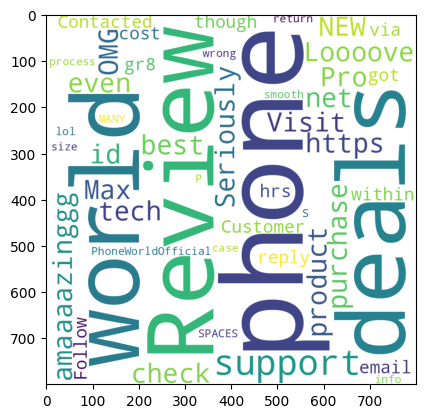

In [21]:
plt.imshow(w_c)

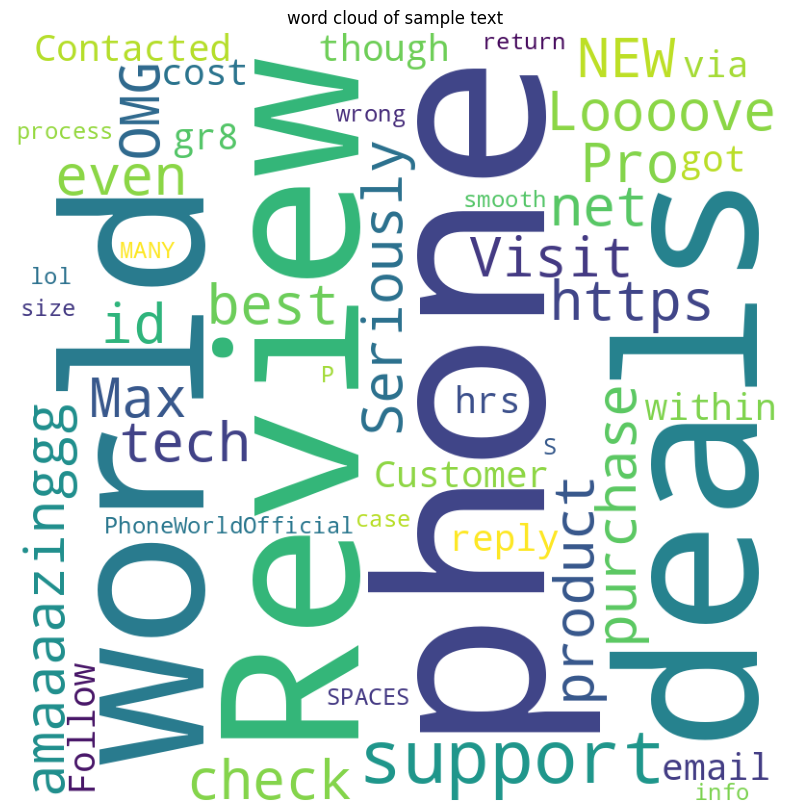

In [22]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("word cloud of sample text")
plt.imshow(w_c)

In [23]:
def show_wordcloud(ipp):
  try:
   wordCloud= WordCloud(width=800,height=800,background_color="white").generate(ipp)
   plt.figure(figsize=(10,10))
   plt.axis("off")
   plt.title("word cloud of sample text")
   plt.imshow(wordCloud)
   return plt

  except Exception as e:
    return f"Error{e}"





In [24]:
text1="""Artificial Intelligence is transforming the world in remarkable ways. From healthcare and education to finance and entertainment, AI-powered solutions are enhancing efficiency and improving lives. However, with rapid advancements come ethical concerns, such as data privacy, bias in algorithms, and job displacement. As we continue to integrate AI into our daily lives, it is essential to strike a balance between innovation and responsibility."""

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

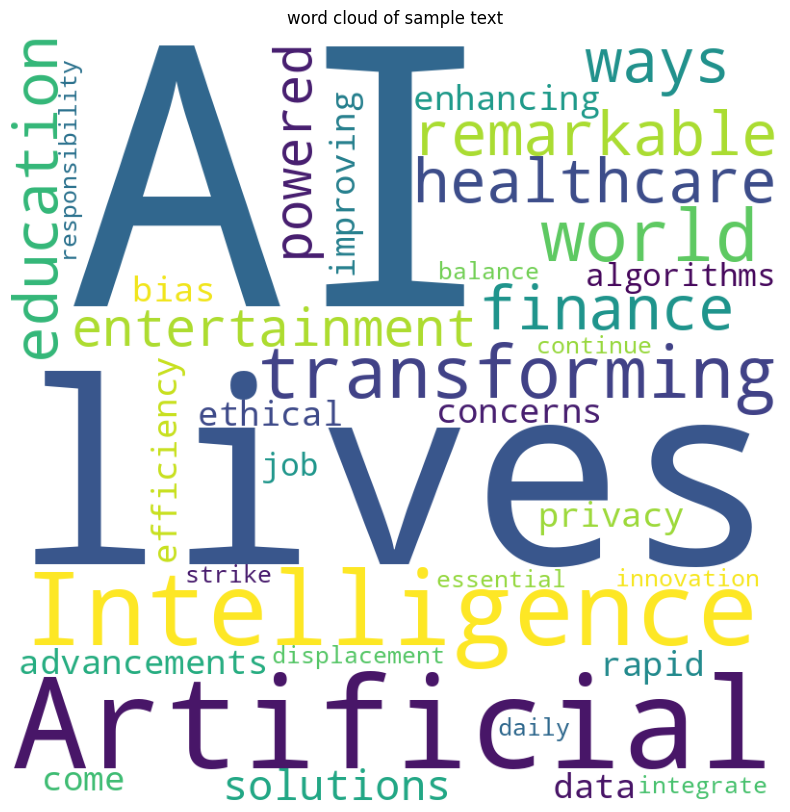

In [25]:
show_wordcloud(text1)

N-Gram Analysis

In [46]:
from nltk.util import ngrams
from collections import Counter
import plotly.graph_objects as go


In [31]:
#create an bigram
bigrams=list(ngrams(filtered_tokens,2))
Counter(bigrams)
bigrams_Count=Counter(bigrams).most_common(15)

In [54]:
lables=[]
counts=[]
for bigrams,count in bigrams_Count:
  lables.append("  ".join(bigrams))
  counts.append(count)

In [55]:
lables

counts=[11,2,7,90,50,30,22,34,56,65,12,13,21,32,25,43,34]


In [57]:
fig= go.Figure(data=
               [go.Bar(
                   x=lables,
                   y=counts,
                   text=counts,
                   textposition="outside")])

#upate
fig.update_layout(height=550,
                  title="top 15 Biagrams",
                  xaxis_title= "Labels",
                  yaxis_title="Frequency")
fig.show()

In [58]:
#function for n-grams
def plot_top_ngrams_bar_chart(token_text,n_gram=2,top_n=15):
  try:
    nGrams=list(ngrams(token_text,n_gram))
    nGram_counter=Counter(nGrams).most_common(top_n)

    if not nGram_counter:
      raise ValueError("No n-grams found")

    lables=[]
    counts=[]
    for nGram,count in nGram_counter:
      lables.append("  ".join(nGram))
      counts.append(count)

      #plotly bar chart
      fig= go.Figure(data=
               [go.Bar(
                   x=lables,
                   y=counts,
                   text=counts,
                   textposition="outside")])

      #update Layout
      fig.update_layout(height=550,
                  title=f"Top {top_n} {n_gram}-grams",
                  xaxis_title= "Labels",
                  yaxis_title="Frequency")
      fig.show()

  except Exception as e:
    print(f"An error occured{e}")



In [66]:
from transformers import pipeline

In [67]:
model_name="nateraw/bert-base-uncased-emotion"
emotion_classifier=pipeline("text-classification",model=model_name,top_k=3)

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [68]:
text="I love India, I am proud Indian I Love Jaipur"
results= emotion_classifier(text)
results

[[{'label': 'joy', 'score': 0.9936826229095459},
  {'label': 'love', 'score': 0.0025156475603580475},
  {'label': 'anger', 'score': 0.0018112497637048364}]]